A particle moves in a periodic box of length $L=10$.  Consider a position-space wavefunction $\psi(x)$ which is unity in the interval $x_1=2\le x \le x_2=3$ and zero for all other values of $x$.  Approximate this wave function as a Fourier series with $2\ell+1$ terms with $-\ell \le m \le \ell$ and plot the result for $\ell$ =10, 20, 40, 80, 100 and 200.

a)
N = 0.5774
b)


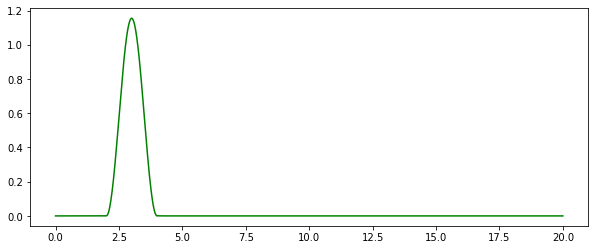

c)


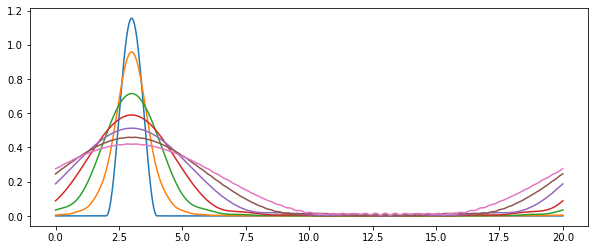

d)


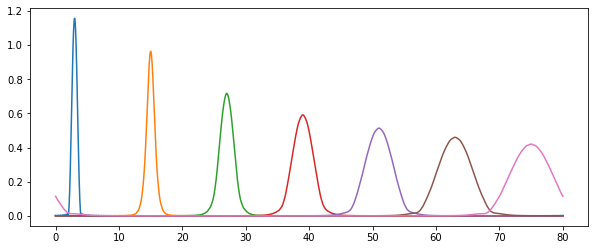

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
# assign constants
L=20 # size of region in which particle moves.
x2=4 # upper limit of psi(x)
x1=2 # lower limit of psi(x)
l_max=200 #(-l \le m \le +l) largest value of l used below
Dx = 0.01 # Accuracy for plotting position
Nx = int(L/Dx)

psi_tilde = np.zeros((2*l_max+1),dtype=complex)
# Calculate psi_tilde for many values of m, not all of which must be used.

#partA
   
x = 1    
psi_og = 1 - np.cos(2*np.pi*(x-x1)/(x2-x1))
psi_squ = lambda x: (1 - np.cos(2*np.pi*(x-x1)/(x2-x1)))**2
prob_tot = quad(psi_squ, x1, x2)[0]

N = (1 /prob_tot)**.5
print("a)")
print("N = " + str(round(N,4)))


#partB
for x in range (0, 2):
    for m in range(-l_max,l_max+1):
        fr = lambda x: N*(1 - np.cos(2*np.pi*(x-x1)/(x2-x1)))*np.cos(2*np.pi*m*x/L) # Real part of given wave function multiplied by inversse Fourier factor.
        fi = lambda x: N*(1 - np.cos(2*np.pi*(x-x1)/(x2-x1)))*np.sin(2*np.pi*m*x/L)  # Imaginary part of given wave function multiplied by inversse Fourier factor.
        Ir = quad(fr, x1, x2)[0] # Perform the inverse Fourier transform integral for the real part
        Ii = -quad(fi, x1, x2)[0]  # Perform the inverse Fourier transform integral for the imaginary part
        psi_tilde[m] = (Ir+1j*Ii)/L**0.5

# Reconstruct psi
psi = np.zeros((Nx+1),dtype=complex) # array to hold the complex value of psi(x)
psi_mag = np.zeros((Nx+1)) # array to hold the magnitude of psi(x) 
x = np.zeros((Nx+1)) # array to hold the values of the position used for plotting 
def wf(l): # define a function that reconstructs the wave function from 2l+1 terms in the Fourier series.
    for n in range(0,Nx+1):
        x[n]=n*Dx
        psi[n] = 0+0j
        for m in range(-l,l+1):
            psi[n] = psi[n]+psi_tilde[m]*np.e**(+2j*np.pi*(m-l)*x[n]/L)/L**0.5
        psi_mag[n] = (psi.real[n]**2+psi.imag[n]**2)**0.5
    return psi_mag
MPSI = np.zeros((Nx+1))
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,1,1)
case=0 # Use this integer below to shift the position of each example to make them easier to compare.
MPSI = wf(100) 
print("b)")
ax.plot(x,MPSI,'g-') #Add a curve described by the arrays x and psi.real to Plot, choose a red solid curve.
plt.show()

#partC
psi_complex = np.zeros((Nx+1),dtype=complex) 
psi_magnitude = np.zeros((Nx+1)) 
position = np.zeros((Nx+1)) 
def wf(l):# function using 2l+1 terms in the Fourier series
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)
    for t in range(0,7) :
        for n in range(0,Nx+1):
            x[n]=n*Dx
            psi[n] = 0+0j
            for m in range(-l,l+1):
                psi[n] = psi[n]+psi_tilde[m]*np.e**(+2j*np.pi*(m)*x[n]/L)/L**0.5*np.e**((-1j*t*.2)*((4*((np.pi)**2)*((m)**2))/(L**2))/2)
            psi_mag[n] = (psi.real[n]**2+psi.imag[n]**2)**0.5
        ax.plot(x,psi_mag)
print("c)")

wf(100)
plt.show()

#partD

L=80 # region size
x2=4 # upper limit 
x1=2 # lower limit 
l_max=100 
Dx = 0.01 
Nx = int(L/Dx)
psi_tilde = np.zeros((2*l_max+1),dtype=complex)
for m in range(-l_max,l_max+1):
    fr = lambda x: N*(1 - np.cos(2*np.pi*(x-x1)/(x2-x1)))*np.cos(2*np.pi*m*x/L) # Real part of given wave function multiplied by inversse Fourier factor.
    fi = lambda x: N*(1 - np.cos(2*np.pi*(x-x1)/(x2-x1)))*np.sin(2*np.pi*m*x/L) # Imaginary part of given wave function multiplied by inversse Fourier factor.
    Ir = quad(fr, x1, x2)[0] # Perform the inverse Fourier transform integral for the real part
    Ii = -quad(fi, x1, x2)[0]  # Perform the inverse Fourier transform integral for the imaginary part
    psi_tilde[m] = (Ir+1j*Ii)/L**0.5
    
psi = np.zeros((Nx+1),dtype=complex) 
psi_magnitude = np.zeros((Nx+1))  
x = np.zeros((Nx+1))  
def wf(l): 
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(1,1,1)
    for t in range(0,7) :
        for n in range(0,Nx+1):
            x[n]=n*Dx
            psi[n] = 0+0j
            for m in range(-l,l+1):
                psi[n] = psi[n]+psi_tilde[m]*np.e**(+2j*np.pi*(m)*x[n]/L)/L**0.5*np.e**((-1j*t*.2)*(((4*((np.pi)**2)*((m)**2))/(L**2))/2+120*((2*np.pi*m)/(L))/2+3600))
            psi_magnitude[n] = (psi.real[n]**2+psi.imag[n]**2)**0.5
        ax.plot(x,psi_magnitude) 
print("d)")

wf(100)
plt.show()